In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'D:\jupyter\youtube\Datasets\P14-Part3-Classification\Section 16 - Logistic Regression\Python\Social_Network_Ads.csv')

In [3]:
df.drop(['Gender','User ID'],axis=1)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
#y_scale=sc_x.fit_transform(y_train)
x_tests=sc_x.transform(x_test)

In [7]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()

In [8]:
classifier.fit(x_train,y_train)

GaussianNB()

In [9]:
classifier.score(x_test,y_test)

0.3625

In [10]:
y_pred=classifier.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 0 51]
 [ 0 29]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


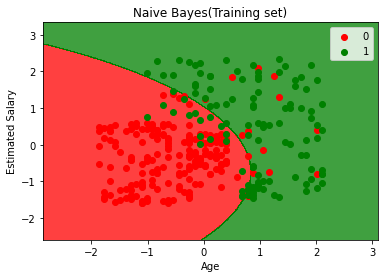

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()